Since the current concentrations $N$ of $CO_2$ in the atmosphere is so high, the direct
dependence of the surface temperature $T$ on $N$ should be given approximately by
$$
T = T_0 + \Delta T {\log{N \over N_0} \over \log 2}\quad\quad\quad\text{(1)}
$$
Here $T_0$ is a reference temperature, say the temperature in 1980 and $N_0$ is the corresponding
atmospheric concentration of $CO_2$, say 340 ppm at Mauna Loa in 1980. From (1) we see
that doubling the CO2 concentration (letting $N = 2N_0$) will increase T by the *temperature
sensitivity* $\Delta T$.

Let's express $\Delta T$:
$$
\Delta T = (T - T_0) {\log 2 \over \log (N/N_0)}\quad\quad\quad\text{(2)}
$$

### $CO_2$ Data

In [1]:
%pylab inline
import urllib

Populating the interactive namespace from numpy and matplotlib


Let's fetch the raw data of $CO_2$ measurements at Mauna Loa from the `noaa.gov` website:

In [2]:
# Only execute this if you want to regenerate the downloaded file
open("data/co2_mm_mlo.txt", "wb").write(urllib.request.urlopen("ftp://ftp.cmdl.noaa.gov/ccg/co2/trends/co2_mm_mlo.txt").read())

49915

In [3]:
D = loadtxt("data/co2_mm_mlo.txt")
years = D[:, 2]
average = D[:, 3]
interpolated = D[:, 4]
trend = D[:, 5]

As explained in the file [co2_mm_mlo.txt](ftp://ftp.cmdl.noaa.gov/ccg/co2/trends/co2_mm_mlo.txt), the `average` column are the raw data of $CO_2$ values averaged over a month, and some months are missing. The `trend` then subtracts "seasonal cycle" computed over a 7 year window. The missing values in `trend` are then linearly interpolated. Finally, the `average` column then contains the `trend` value plus average seasonal cycle (i.e. `average` and `interpolated` contain the same values except for missing months, which are "intelligently" interpolated). We should do this analysis ourselves in the notebook directly from the `average` data only, but for now let's reuse this analysis.

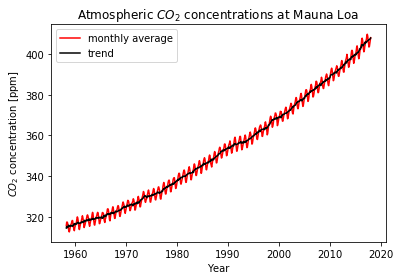

In [4]:
plot(years, interpolated, "r-", lw=1.5, label="monthly average")
plot(years, trend, "k-", label="trend")
xlabel("Year")
ylabel("$CO_2$ concentration [ppm]")
title("Atmospheric $CO_2$ concentrations at Mauna Loa")
legend(loc="upper left");

Let's get numbers for $N$ (year 2010) and $N_0$ (year 1980) by reading it off the $y$-axis:

In [5]:
idx1980 = sum(years < 1980)
idx2010 = sum(years < 2010)
N0 = trend[idx1980]
N  = trend[idx2010]
print("N0 = %.2f ppm  (year %.3f)" % (N0, years[idx1980]))
print("N  = %.2f ppm  (year %.3f)" % (N,  years[idx2010]))

N0 = 338.09 ppm  (year 1980.042)
N  = 388.41 ppm  (year 2010.042)


### Temperature changes

Warming from Berkeley Earth in the last 30 years (see a separate notebook for this calculation):

In [6]:
dTdt = 0.24995728742972512 # C / decade

Warming over the past 30 years using satellite measuremenets (see a separate notebook for this calculation):

In [7]:
dTdt = 0.13764588789937693 # C / decade

We'll use the satellite measurements, as arguably they have less systematic errors.
Temperature difference:

In [8]:
dT = dTdt * 3 # 3 decades
dT

0.4129376636981308

### Calculation of temperature sensitivity

From equation (2) we then directly calculate:

In [9]:
from math import log
deltaT = dT * log(2) / log(1.0*N/N0)
print("∆T = ", deltaT, "C")

∆T =  2.0629039075597113 C


This assumes that all warming (`dT` = $T-T_0$) has been caused by $CO_2$ in the past 30 years. If for example only $1/2$ of the warming was caused by $CO_2$, then $\Delta T \approx 1 C$. If on the other hand $CO_2$ stays longer in the atmosphere than other chemicals that might be temporarily cooling the atmosphere down by let's say $1/2$, then $\Delta T \approx 4 C$.